# 케라스 CNN Fashion MNIST

#### module import

In [2]:
%load_ext tensorboard

In [3]:
import datetime
import numpy as np
import tensorflow as tf
import tensorflow.keras as tf
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-white')

from keras.models import Model, Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout, Input
from keras.utils import to_categorical
from keras.datasets.fashion_mnist import load_data
from keras.preprocessing.image import ImageDataGenerator

2024-01-15 13:33:24.997622: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-15 13:33:24.997691: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-15 13:33:25.043140: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-15 13:33:25.126603: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-15 13:33:26.241591: W tensorflow/compiler/tf2

### 데이터 로드 및 전처리

In [4]:
(x_train, y_train), (x_test, y_test) = load_data()

x_train = x_train[..., np.newaxis]
x_test = x_test[..., np.newaxis]

x_train = x_train / 255
x_test = x_test / 255

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)
(60000,)
(10000,)


In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

### 모델 구성 및 컴파일
- 임의의 모델

In [6]:
def build_model():
    model = Sequential()

    inp = Input(shape=(28, 28, 1))
    out = Conv2D(filters=32, kernel_size=(3, 3))(inp)
    out = Conv2D(filters=64, kernel_size=(3, 3))(out)
    out = Flatten()(out)
    out = Dense(units=128, activation='relu')(out)
    out = Dense(units=64, activation='relu')(out)
    out = Dense(units=10, activation='softmax')(out)

    model = Model(inputs=inp, outputs=out)

    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

model_1 = build_model()

model_1.summary()

2024-01-15 13:33:28.356024: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:23:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-01-15 13:33:28.503618: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:23:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-01-15 13:33:28.503665: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:23:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-01-15 13:33:28.505381: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:23:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-01-15 13:33:28.505418: I external/local_xla/xla/stream_executor

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 flatten (Flatten)           (None, 36864)             0         
                                                                 
 dense (Dense)               (None, 128)               4718720   
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 10)                650   

### 모델 학습
- 런타임 GPU로 설정

In [7]:
hist_1 = model_1.fit(
    x_train, y_train,
    epochs=50,
    batch_size=128,
    validation_split=.3
)

Epoch 1/50


2024-01-15 13:33:30.150936: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8907
2024-01-15 13:33:30.410256: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-01-15 13:33:30.909341: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-01-15 13:33:30.992748: I external/local_xla/xla/service/service.cc:168] XLA service 0x7fb0083573b0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-01-15 13:33:30.992926: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Ti, Compute Capability 8.6
2024-01-15 13:33:31.011591: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1705293211.136288    4970 device_compil

329/329 [==============================] - 7s 12ms/step - loss: 0.4901 - accuracy: 0.8262 - val_loss: 0.3841 - val_accuracy: 0.8629
Epoch 2/50
329/329 [==============================] - 3s 9ms/step - loss: 0.3256 - accuracy: 0.8805 - val_loss: 0.3549 - val_accuracy: 0.8741
Epoch 3/50
329/329 [==============================] - 3s 9ms/step - loss: 0.2676 - accuracy: 0.9001 - val_loss: 0.3492 - val_accuracy: 0.8757
Epoch 4/50
329/329 [==============================] - 3s 9ms/step - loss: 0.2252 - accuracy: 0.9165 - val_loss: 0.3890 - val_accuracy: 0.8683
Epoch 5/50
329/329 [==============================] - 3s 9ms/step - loss: 0.1840 - accuracy: 0.9313 - val_loss: 0.4136 - val_accuracy: 0.8653
Epoch 6/50
329/329 [==============================] - 3s 9ms/step - loss: 0.1566 - accuracy: 0.9429 - val_loss: 0.4442 - val_accuracy: 0.8707
Epoch 7/50
329/329 [==============================] - 3s 9ms/step - loss: 0.1384 - accuracy: 0.9499 - val_loss: 0.4801 - val_accuracy: 0.8767
Epoch 8/50
329/3

### 학습 결과 시각화

In [8]:
hist_1_dict = hist_1.history

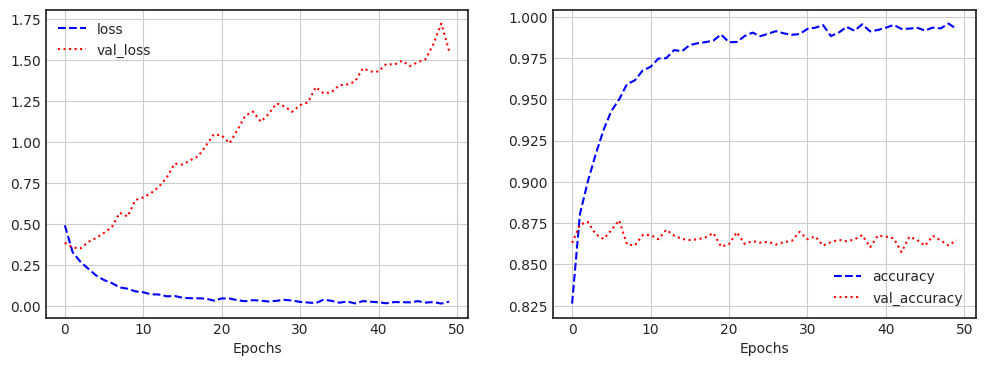

In [9]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(hist_1_dict['loss'], 'b--', label='loss')
plt.plot(hist_1_dict['val_loss'], 'r:', label='val_loss')
plt.xlabel("Epochs")
plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(hist_1_dict['accuracy'], 'b--', label='accuracy')
plt.plot(hist_1_dict['val_accuracy'], 'r:', label='val_accuracy')
plt.xlabel("Epochs")
plt.grid()
plt.legend()

plt.show()

### 모델 평가

In [10]:
model_1.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 1.6721 - accuracy: 0.8557


[1.6721056699752808, 0.8557000160217285]

### 모델 재구성
- 학습 파라미터의 수 비교

In [11]:
def build_model2():
    model = Sequential()

    inp = Input(shape=(28, 28, 1))
    out = Conv2D(filters=32, kernel_size=(3, 3))(inp)
    out = MaxPool2D(strides=(2, 2))(out)
    out = Conv2D(filters=64, kernel_size=(3, 3))(out)
    out = MaxPool2D(strides=(2, 2))(out)
    out = Flatten()(out)
    out = Dense(units=128, activation='relu')(out)
    out = Dropout(0.3)(out)
    out = Dense(units=64, activation='relu')(out)
    out = Dropout(0.3)(out)
    out = Dense(units=10, activation='softmax')(out)

    model = Model(inputs=inp, outputs=out)

    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

model_2 = build_model2()

model_2.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0   

### 모델 재학습

In [12]:
hist_2 = model_2.fit(
    x_train, y_train,
    epochs=50,
    batch_size=128,
    validation_split=.3
)

Epoch 1/50
329/329 [==============================] - 5s 9ms/step - loss: 0.7851 - accuracy: 0.7192 - val_loss: 0.4628 - val_accuracy: 0.8244
Epoch 2/50
329/329 [==============================] - 2s 7ms/step - loss: 0.4847 - accuracy: 0.8291 - val_loss: 0.3777 - val_accuracy: 0.8638
Epoch 3/50
329/329 [==============================] - 3s 8ms/step - loss: 0.4105 - accuracy: 0.8544 - val_loss: 0.3514 - val_accuracy: 0.8716
Epoch 4/50
329/329 [==============================] - 2s 7ms/step - loss: 0.3688 - accuracy: 0.8696 - val_loss: 0.3266 - val_accuracy: 0.8774
Epoch 5/50
329/329 [==============================] - 3s 8ms/step - loss: 0.3408 - accuracy: 0.8781 - val_loss: 0.3032 - val_accuracy: 0.8919
Epoch 6/50
329/329 [==============================] - 3s 8ms/step - loss: 0.3145 - accuracy: 0.8878 - val_loss: 0.2989 - val_accuracy: 0.8931
Epoch 7/50
329/329 [==============================] - 3s 8ms/step - loss: 0.2937 - accuracy: 0.8944 - val_loss: 0.3012 - val_accuracy: 0.8917
Epoch 

In [13]:
hist_2_dict = hist_2.history

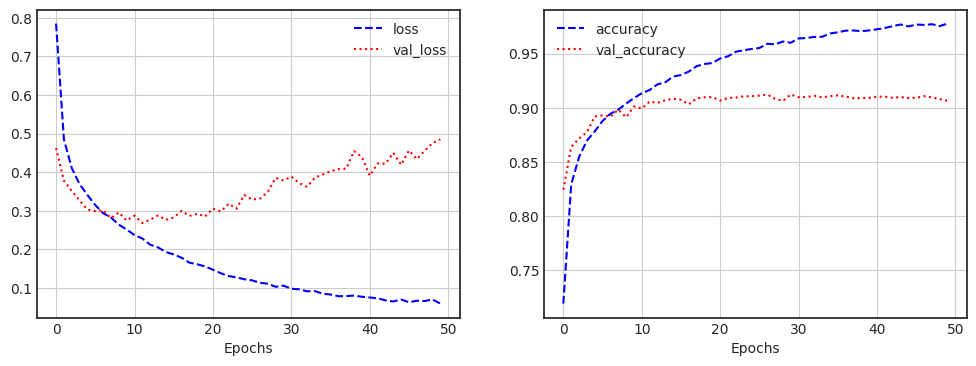

In [14]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(hist_2_dict['loss'], 'b--', label='loss')
plt.plot(hist_2_dict['val_loss'], 'r:', label='val_loss')
plt.xlabel("Epochs")
plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(hist_2_dict['accuracy'], 'b--', label='accuracy')
plt.plot(hist_2_dict['val_accuracy'], 'r:', label='val_accuracy')
plt.xlabel("Epochs")
plt.grid()
plt.legend()

plt.show()

### 모델 재평가

In [15]:
model_2.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.5002 - accuracy: 0.9027


[0.5002214312553406, 0.9027000069618225]

## 모델 성능 높이기 - 많은 레이어 쌓기

In [16]:
from keras.layers import BatchNormalization, ReLU

In [17]:
def build_model3():
    model = Sequential()

    inp = Input(shape=(28, 28, 1))
    out = Conv2D(filters=32, kernel_size=(3, 3), activation=ReLU(), padding='same')(inp)
    out = Conv2D(filters=64, kernel_size=(3, 3), activation=ReLU(), padding='valid')(inp)
    out = MaxPool2D(strides=(2, 2))(out)
    out = Dropout(0.5)(out)

    out = Conv2D(filters=128, kernel_size=(3, 3), activation=ReLU(), padding='same')(out)
    out = Conv2D(filters=256, kernel_size=(3, 3), activation=ReLU(), padding='valid')(out)
    out = MaxPool2D(strides=(2, 2))(out)
    out = Dropout(0.5)(out)

    out = Flatten()(out)
    out = Dense(units=256, activation='relu')(out)
    out = Dropout(0.5)(out)
    out = Dense(units=100, activation='relu')(out)
    out = Dropout(0.5)(out)
    out = Dense(units=10, activation='softmax')(out)

    model = Model(inputs=inp, outputs=out)

    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

model_3 = build_model3()

model_3.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_5 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 64)        0         
 g2D)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 13, 13, 64)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 13, 13, 128)       73856     
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 256)       295168    
                                                           

## 모델 학습 및 결과 시각화

In [18]:
hist_3 = model_3.fit(
    x_train, y_train,
    epochs=50,
    batch_size=128,
    validation_split=.3
)

Epoch 1/50


2024-01-15 13:38:07.136252: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel_2/dropout_2/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


329/329 [==============================] - 8s 15ms/step - loss: 0.8564 - accuracy: 0.6854 - val_loss: 0.4454 - val_accuracy: 0.8350
Epoch 2/50
329/329 [==============================] - 4s 12ms/step - loss: 0.4910 - accuracy: 0.8270 - val_loss: 0.3327 - val_accuracy: 0.8754
Epoch 3/50
329/329 [==============================] - 4s 13ms/step - loss: 0.4095 - accuracy: 0.8567 - val_loss: 0.3183 - val_accuracy: 0.8811
Epoch 4/50
329/329 [==============================] - 4s 13ms/step - loss: 0.3690 - accuracy: 0.8685 - val_loss: 0.2897 - val_accuracy: 0.8941
Epoch 5/50
329/329 [==============================] - 4s 13ms/step - loss: 0.3463 - accuracy: 0.8781 - val_loss: 0.2721 - val_accuracy: 0.9021
Epoch 6/50
329/329 [==============================] - 4s 13ms/step - loss: 0.3309 - accuracy: 0.8846 - val_loss: 0.2587 - val_accuracy: 0.9064
Epoch 7/50
329/329 [==============================] - 4s 13ms/step - loss: 0.3122 - accuracy: 0.8890 - val_loss: 0.2652 - val_accuracy: 0.9031
Epoch 8/50

- 과적합은 되지 않았지만 층을 늘려도 좋은 성능을 낼 수 있음

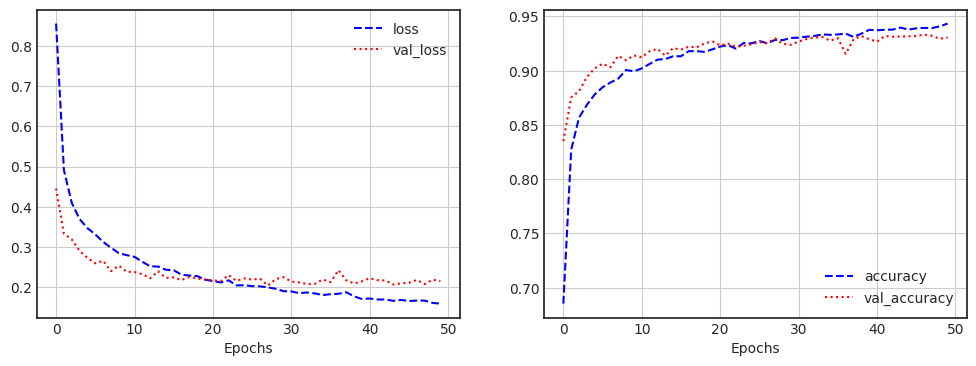

In [19]:
hist_3_dict = hist_3.history

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(hist_3_dict['loss'], 'b--', label='loss')
plt.plot(hist_3_dict['val_loss'], 'r:', label='val_loss')
plt.xlabel("Epochs")
plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(hist_3_dict['accuracy'], 'b--', label='accuracy')
plt.plot(hist_3_dict['val_accuracy'], 'r:', label='val_accuracy')
plt.xlabel("Epochs")
plt.grid()
plt.legend()

plt.show()

In [20]:
model_3.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2412 - accuracy: 0.9237


[0.24118860065937042, 0.9236999750137329]

## 모델 성능 높이기 - 이미지 보강(Image Augmentation)

- 주요 인자 참고: https://keras.io/ko/preprocessing/image/

In [21]:
from keras.preprocessing.image import ImageDataGenerator

In [22]:
img_geneartor = ImageDataGenerator(
    rotation_range=10, # 회전
    zoom_range=.2, # 확대
    shear_range=.6, # 밀리게
    width_shift_range=.1,
    height_shift_range=.1,
    horizontal_flip=True, # 수평 반전
    vertical_flip=False
)

In [23]:
augment_size = 200

In [24]:
print(x_train.shape)
print(x_train[0].shape)

(60000, 28, 28, 1)
(28, 28, 1)


In [25]:
x_augment = img_geneartor.flow(
    np.tile(x_train[0].reshape(28 * 28 * 1), augment_size).reshape(-1, 28, 28, 1),
    np.zeros(augment_size),
    batch_size=augment_size,
    shuffle=False).next()[0]

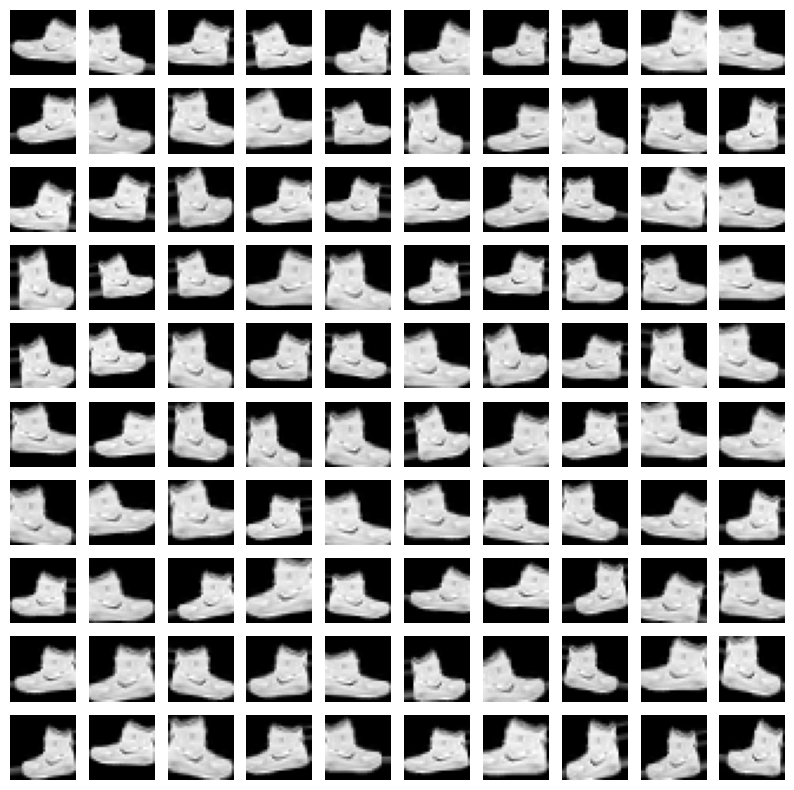

In [26]:
plt.figure(figsize=(10, 10))

for i in range(1, 101):
    plt.subplot(10, 10, i)
    plt.axis('off')
    plt.imshow(x_augment[i - 1].reshape(28, 28), cmap='gray')

데이터 추가

In [27]:
img_geneartor = ImageDataGenerator(
    rotation_range=15, # 회전
    zoom_range=.1, # 확대
    shear_range=.6, # 밀리게
    width_shift_range=.15,
    height_shift_range=.1,
    horizontal_flip=True, # 수평 반전
    vertical_flip=False
)

In [28]:
augment_size = 30_000

In [29]:
random_mask = np.random.randint(x_train.shape[0], size=augment_size)
x_augmented = x_train[random_mask].copy()
y_augmented = y_train[random_mask].copy()

In [30]:
x_augmented = img_geneartor.flow(
    x_augmented, np.zeros(augment_size),
    batch_size=augment_size, shuffle=False
).next()[0]

x_train = np.concatenate((x_train, x_augmented))
y_train = np.concatenate((y_train, y_augmented))

print(x_train.shape)
print(y_train.shape)

(90000, 28, 28, 1)
(90000,)


## 모델 학습 및 결과 시각화

In [31]:
model_4 = build_model3()

model_4.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 13, 13, 64)        0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 13, 13, 64)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 13, 13, 128)       73856     
                                                                 
 conv2d_11 (Conv2D)          (None, 11, 11, 256)       295168    
                                                           

In [33]:
hist_4 = model_4.fit(
    x_train, y_train,
    epochs=50,
    batch_size=128,
    validation_split=.3
)

Epoch 1/50
493/493 [==============================] - 7s 15ms/step - loss: 0.4556 - accuracy: 0.8383 - val_loss: 0.6440 - val_accuracy: 0.7518
Epoch 2/50
493/493 [==============================] - 6s 12ms/step - loss: 0.3914 - accuracy: 0.8617 - val_loss: 0.5928 - val_accuracy: 0.7760
Epoch 3/50
493/493 [==============================] - 6s 13ms/step - loss: 0.3588 - accuracy: 0.8725 - val_loss: 0.5916 - val_accuracy: 0.7764
Epoch 4/50
493/493 [==============================] - 6s 12ms/step - loss: 0.3385 - accuracy: 0.8788 - val_loss: 0.5890 - val_accuracy: 0.7748
Epoch 5/50
493/493 [==============================] - 6s 12ms/step - loss: 0.3209 - accuracy: 0.8875 - val_loss: 0.5588 - val_accuracy: 0.7863
Epoch 6/50
493/493 [==============================] - 6s 12ms/step - loss: 0.3063 - accuracy: 0.8896 - val_loss: 0.5570 - val_accuracy: 0.7893
Epoch 7/50
493/493 [==============================] - 6s 13ms/step - loss: 0.2974 - accuracy: 0.8954 - val_loss: 0.5585 - val_accuracy: 0.7884

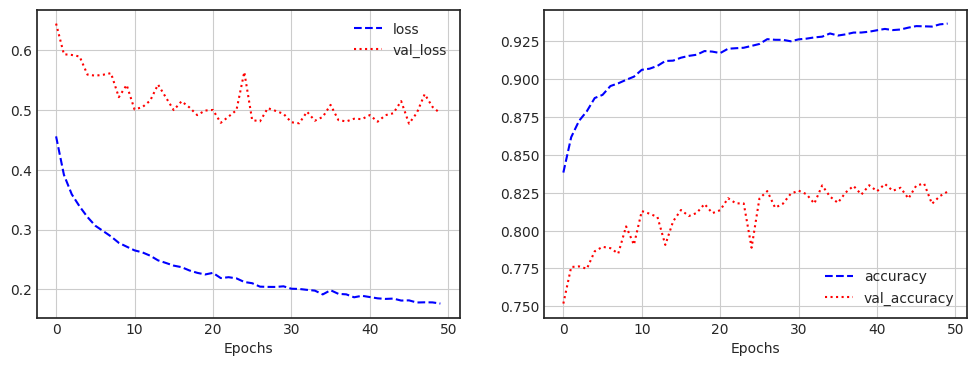

In [34]:
hist_4_dict = hist_4.history

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(hist_4_dict['loss'], 'b--', label='loss')
plt.plot(hist_4_dict['val_loss'], 'r:', label='val_loss')
plt.xlabel("Epochs")
plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(hist_4_dict['accuracy'], 'b--', label='accuracy')
plt.plot(hist_4_dict['val_accuracy'], 'r:', label='val_accuracy')
plt.xlabel("Epochs")
plt.grid()
plt.legend()

plt.show()

- 학습 인자를 이전과 다르게 주면서 학습하면 더 잘 나올것으로 판단

In [35]:
model_4.evaluate(x_train, y_train)

2813/2813 [==============================] - 11s 4ms/step - loss: 0.2080 - accuracy: 0.9277


[0.20797871053218842, 0.9277111291885376]